<a href="https://colab.research.google.com/github/ritamgh/DLT-lab/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_outcome = pd.crosstab(index=df["species"],
                              columns="count")

iris_outcome

col_0,count
species,
setosa,50
versicolor,50
virginica,50


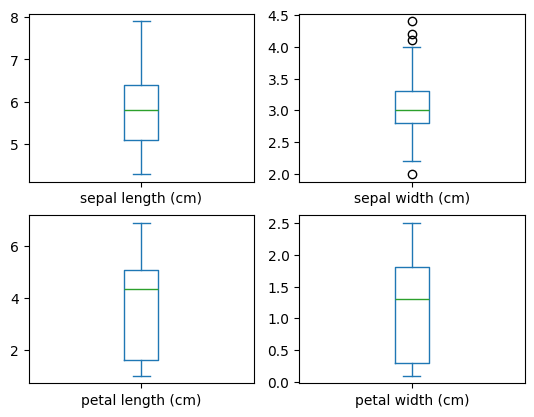

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

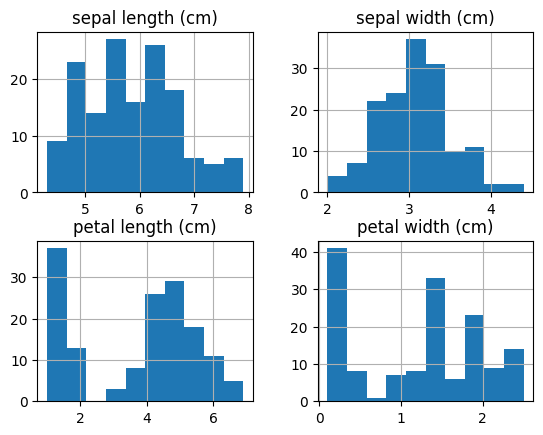

In [ ]:
df.hist()
plt.show()

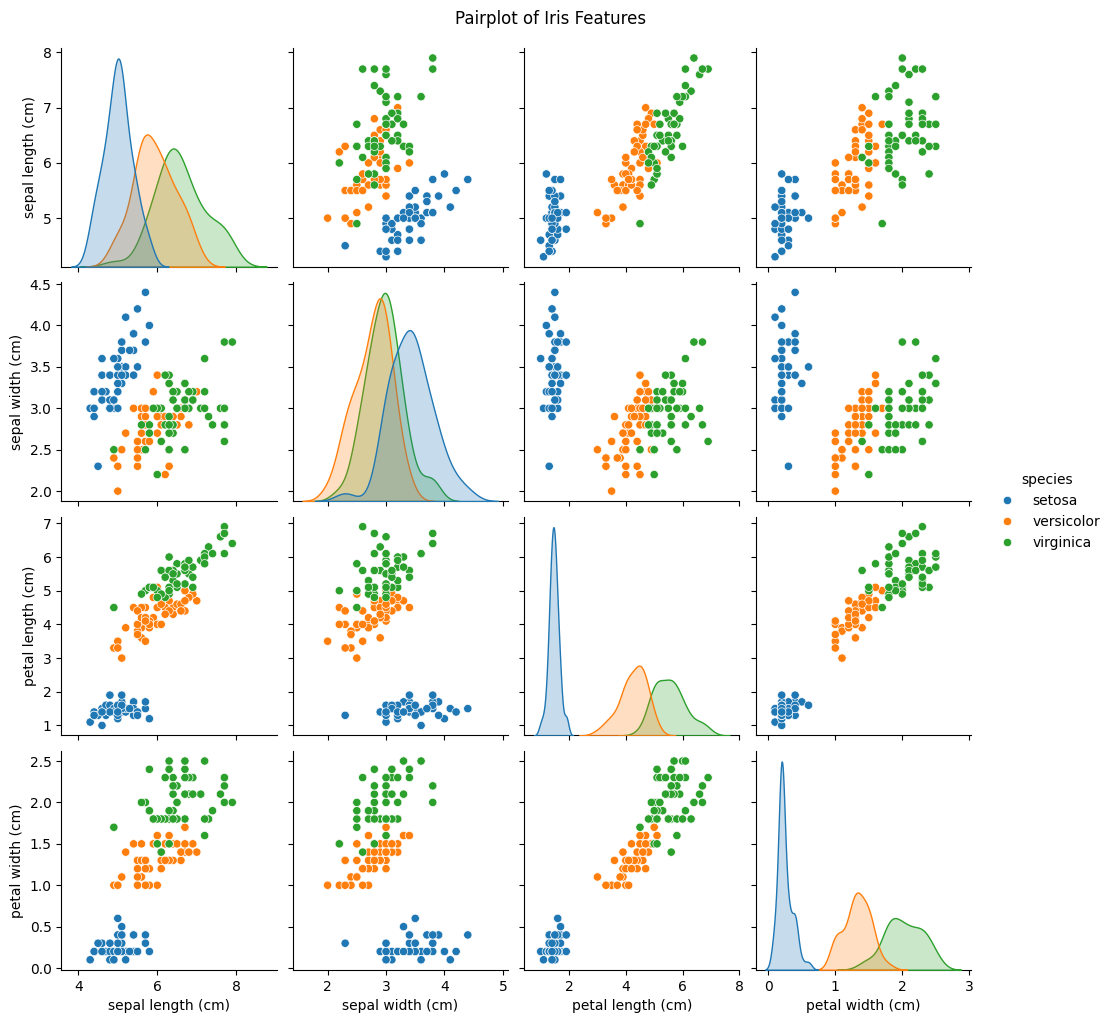

In [ ]:
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

predicted_clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = predicted_clusters


In [ ]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# True labels
true_labels = iris.target

# Adjusted Rand Index (1.0 = perfect match)
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index: {ari:.2f}")


Adjusted Rand Index: 0.43


PCA+GMM

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
from sklearn.mixture import GaussianMixture

# Fit GMM with 3 components (clusters)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_pca)


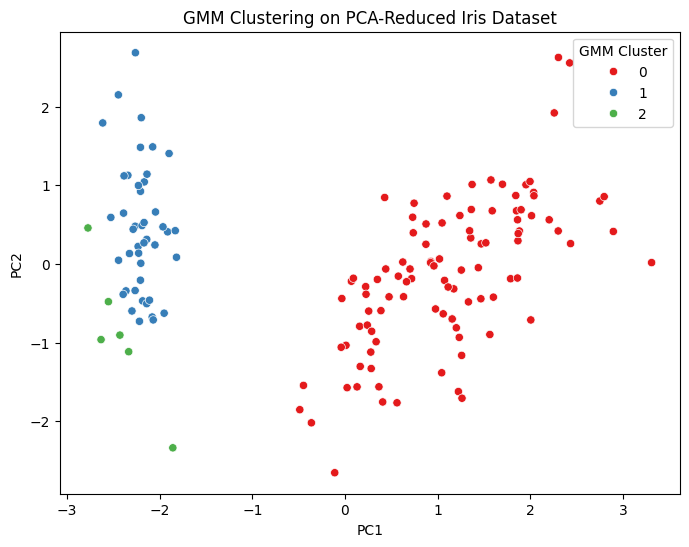

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with PCA and cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['GMM Cluster'] = gmm_labels
df_pca['True Species'] = iris.target_names[iris.target]

# Plot GMM clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='GMM Cluster', palette='Set1')
plt.title("GMM Clustering on PCA-Reduced Iris Dataset")
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Compare predicted clusters with true species
ari = adjusted_rand_score(iris.target, gmm_labels)
print(f"Adjusted Rand Index (GMM + PCA): {ari:.2f}")


Adjusted Rand Index (GMM + PCA): 0.51


KNN

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

X = df.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

KNN Model Accuracy: 1.00


In [9]:
# Recall the ARI for K-Means (from cell lwATFrzdAwrY)
kmeans_ari = 0.43

# Recall the ARI for PCA+GMM (from cell l46NdS7OCImi)
pca_gmm_ari = 0.51

# Recall the Accuracy for KNN (from the previous subtask)
knn_accuracy = 1.00

print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.2f}")
print(f"PCA + GMM Adjusted Rand Index (ARI): {pca_gmm_ari:.2f}")
print(f"KNN Model Accuracy: {knn_accuracy:.2f}\n")

print("Model Performance Summary:")
print("--------------------------")
print(f"K-Means, a clustering algorithm, achieved an ARI of {kmeans_ari:.2f}.")
print(f"PCA + GMM, also a clustering approach, achieved a higher ARI of {pca_gmm_ari:.2f}.")
print(f"KNN, a classification algorithm, achieved an accuracy of {knn_accuracy:.2f}.")


K-Means Adjusted Rand Index (ARI): 0.43
PCA + GMM Adjusted Rand Index (ARI): 0.51
KNN Model Accuracy: 1.00

Model Performance Summary:
--------------------------
K-Means, a clustering algorithm, achieved an ARI of 0.43.
PCA + GMM, also a clustering approach, achieved a higher ARI of 0.51.
KNN, a classification algorithm, achieved an accuracy of 1.00.
